In [2]:
!pwd

/Users/zainsou/Desktop/IFA


(1003, 4800, 50)


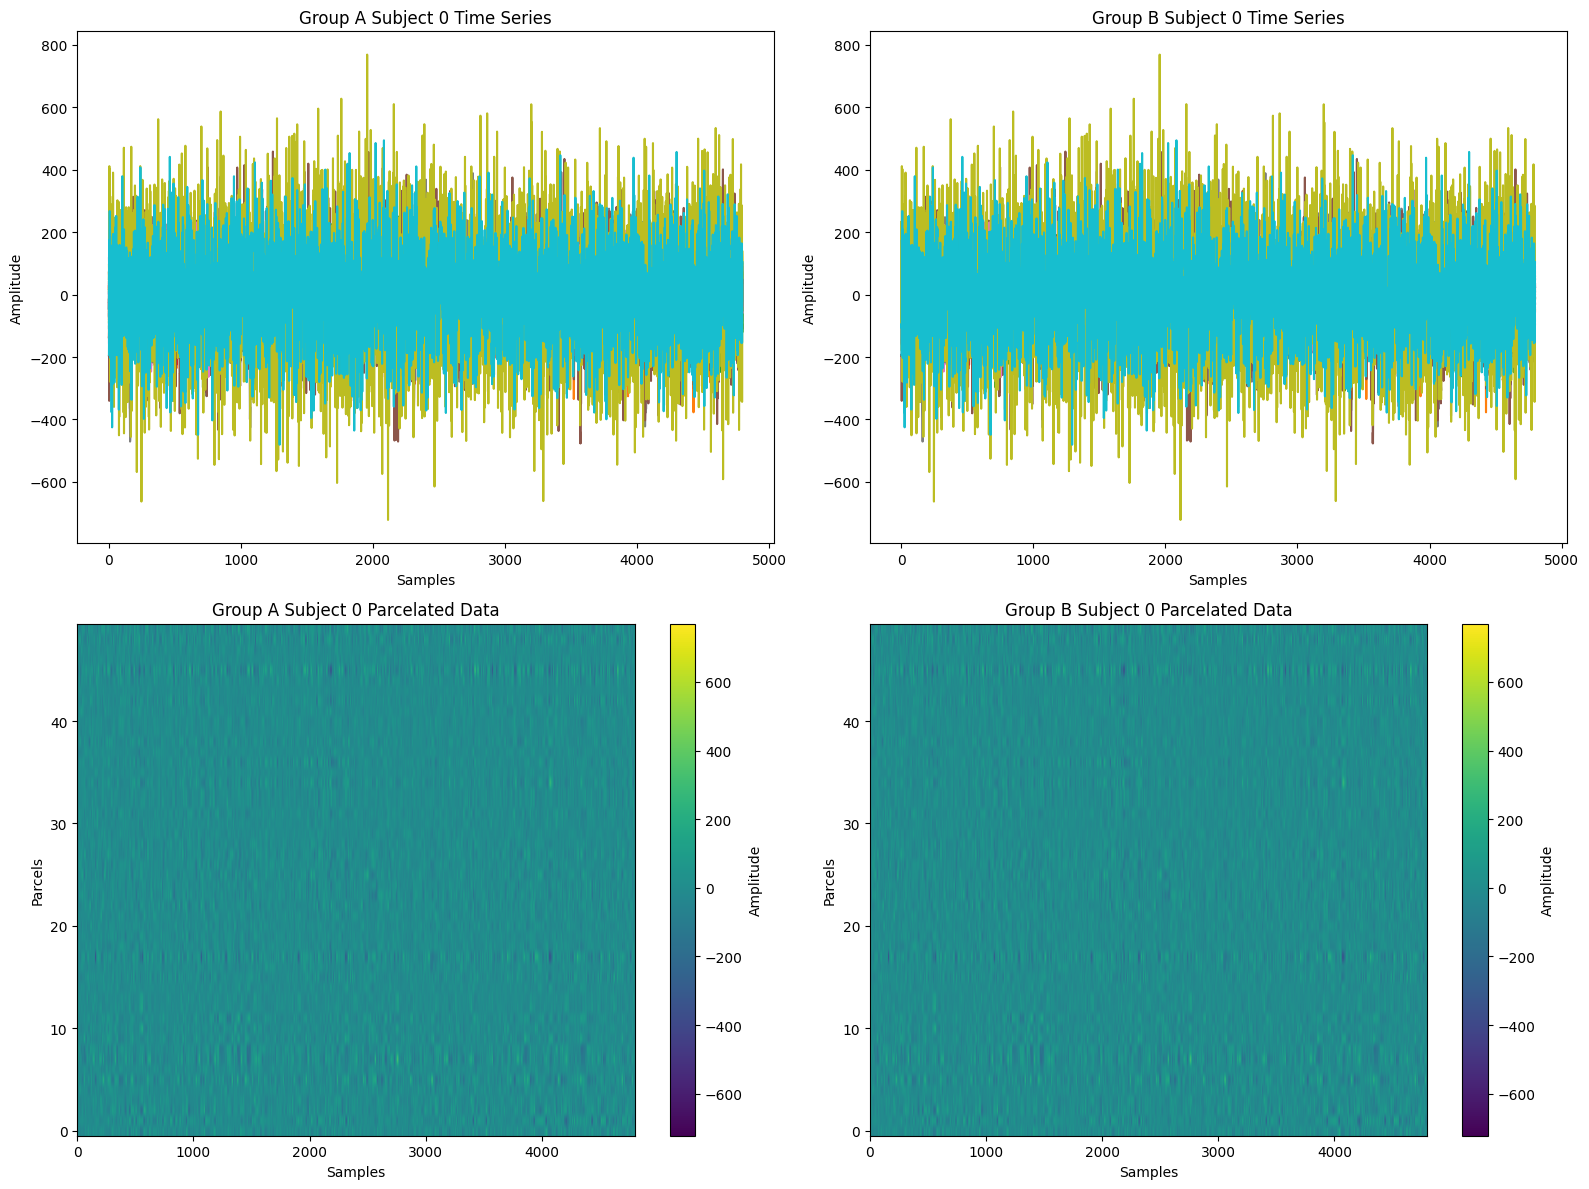

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

def visualize_semi_simulated_subject(groupA_data, groupB_data):
    """
    Visualize the semi-simulated subjects' data.

    Parameters:
    groupA_data (numpy.ndarray): Simulated data for group A.
    groupB_data (numpy.ndarray): Simulated data for group B.
    """
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    axes[0, 0].plot(groupA_data[0, :, :])
    axes[0, 0].set_title('Group A Subject 0 Time Series')
    axes[0, 0].set_xlabel('Samples')
    axes[0, 0].set_ylabel('Amplitude')

    axes[0, 1].plot(groupB_data[0, :, :])
    axes[0, 1].set_title('Group B Subject 0 Time Series')
    axes[0, 1].set_xlabel('Samples')
    axes[0, 1].set_ylabel('Amplitude')

    img = axes[1, 0].imshow(groupA_data[0, :, :].T, aspect='auto', cmap='viridis', origin='lower')
    cbar = plt.colorbar(img, ax=axes[1, 0])
    cbar.set_label('Amplitude')
    axes[1, 0].set_title('Group A Subject 0 Parcelated Data')
    axes[1, 0].set_xlabel('Samples')
    axes[1, 0].set_ylabel('Parcels')
    
    img = axes[1, 1].imshow(groupB_data[0, :, :].T, aspect='auto', cmap='viridis', origin='lower')
    cbar = plt.colorbar(img, ax=axes[1, 1])
    cbar.set_label('Amplitude')
    axes[1, 1].set_title('Group B Subject 0 Parcelated Data')
    axes[1, 1].set_xlabel('Samples')
    axes[1, 1].set_ylabel('Parcels')

    plt.tight_layout()
    plt.show()

def load_time_series_data(folder_path):
    """
    Load all node time series data from text files in a specified folder
    and save it as a NumPy array.

    Parameters:
    folder_path (str): Path to the folder containing the text files.

    Returns:
    np.ndarray: A 3D NumPy array with dimensions (n_subjects, time_points, nodes).
    """
    # List all text files in the directory
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    
    # Initialize an empty list to hold the data arrays
    data_list = []

    for file_name in file_names:
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Load the data from the text file
        data = np.loadtxt(file_path)
        
        # Append the loaded data to the list
        data_list.append(data)
    
    # Stack the data arrays along a new axis to create a 3D array
    data_array = np.array(data_list)

    return data_array

# Path to the folder containing the text files
folder_path = '../grotHCP/3T_HCP1200_MSMAll_d50_ts2'

# Load the data
time_series_data = load_time_series_data(folder_path)
print(time_series_data.shape)

visualize_semi_simulated_subject(time_series_data, time_series_data)